# Lending Club Statistics 선형 회귀 분석

이 데이터셋에는 현재 대출 상태 (대출중, 연체, 갚음 등) 및 최신 지불 정보를 포함하여 명시된 기간 동안 발행 된 모든 대출에 대한 완전한 대출 데이터가 들어 있습니다. "현재"를 통한 대출 데이터가 포함 된 파일에는 이전에 완료 한 달력 분기를 통해 발행 된 모든 대출에 대한 전체 대출 데이터가 들어 있습니다.

* 데이터 형식
    * 데이터 행 : 410907 건
    * 파일 크기 : 278MB


In [1]:
df0 = pd.read_csv("~/hosthome/Documents/workspaces/projects/fc_team_project2/datasets/lcdf4.csv")

# 데이터 소개

총 120개의 컬럼 중에서 최종적으로 사용하게된 컬럼입니다.

|컬럼명|설명
|---|---|
|installment|한달에 갚아야 하는 양|
|dti|월 벌어들이는 수입에서 빚갚는데 나가는 비율 (부채비율)|
|inq_last_6mths|6개월간 문의횟수|
|last_pymnt_amnt|지난달에 갚은 양|
|open_acc_6m|6개월 동안 계좌 개설|
|open_il_6m|할부계좌 열린 갯수|
|all_util|신용한도 잔액|
|total_rev_hi_lim|리볼빙 계좌 총 한도|
|total_cu_tl|금융거래횟수|
|inq_last_12m|12개월간 문의횟수|
|avg_cur_bal|현금잔액평균|
|mo_sin_old_il_acct|얼마나 오래전부터 할부계좌 열었는지|
|mo_sin_old_rev_tl_op|얼마나 오래전부터 리볼빙되는 계좌를 열었는지|
|pct_tl_nvr_dlq|연체되지 않은 거래의 비율|
|total_bc_limit|은행 카드 한계|
|total_il_high_credit_limit|빌릴 수 있는 신용한도|


In [31]:
print(sm.OLS.from_formula("int_rate ~ mths_since_last_record + open_acc + acc_now_delinq+ tot_coll_amt+ chargeoff_within_12_mths", data=df0).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     65.17
Date:                Wed, 12 Jul 2017   Prob (F-statistic):           3.83e-68
Time:                        12:06:54   Log-Likelihood:                 20617.
No. Observations:               78997   AIC:                        -4.122e+04
Df Residuals:                   78991   BIC:                        -4.117e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [32]:
#grade to integer 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df0["sub_grade"].value_counts().index.sort_values())
le.classes_
df0["sub_grade_t"]=le.transform(df0["sub_grade"])

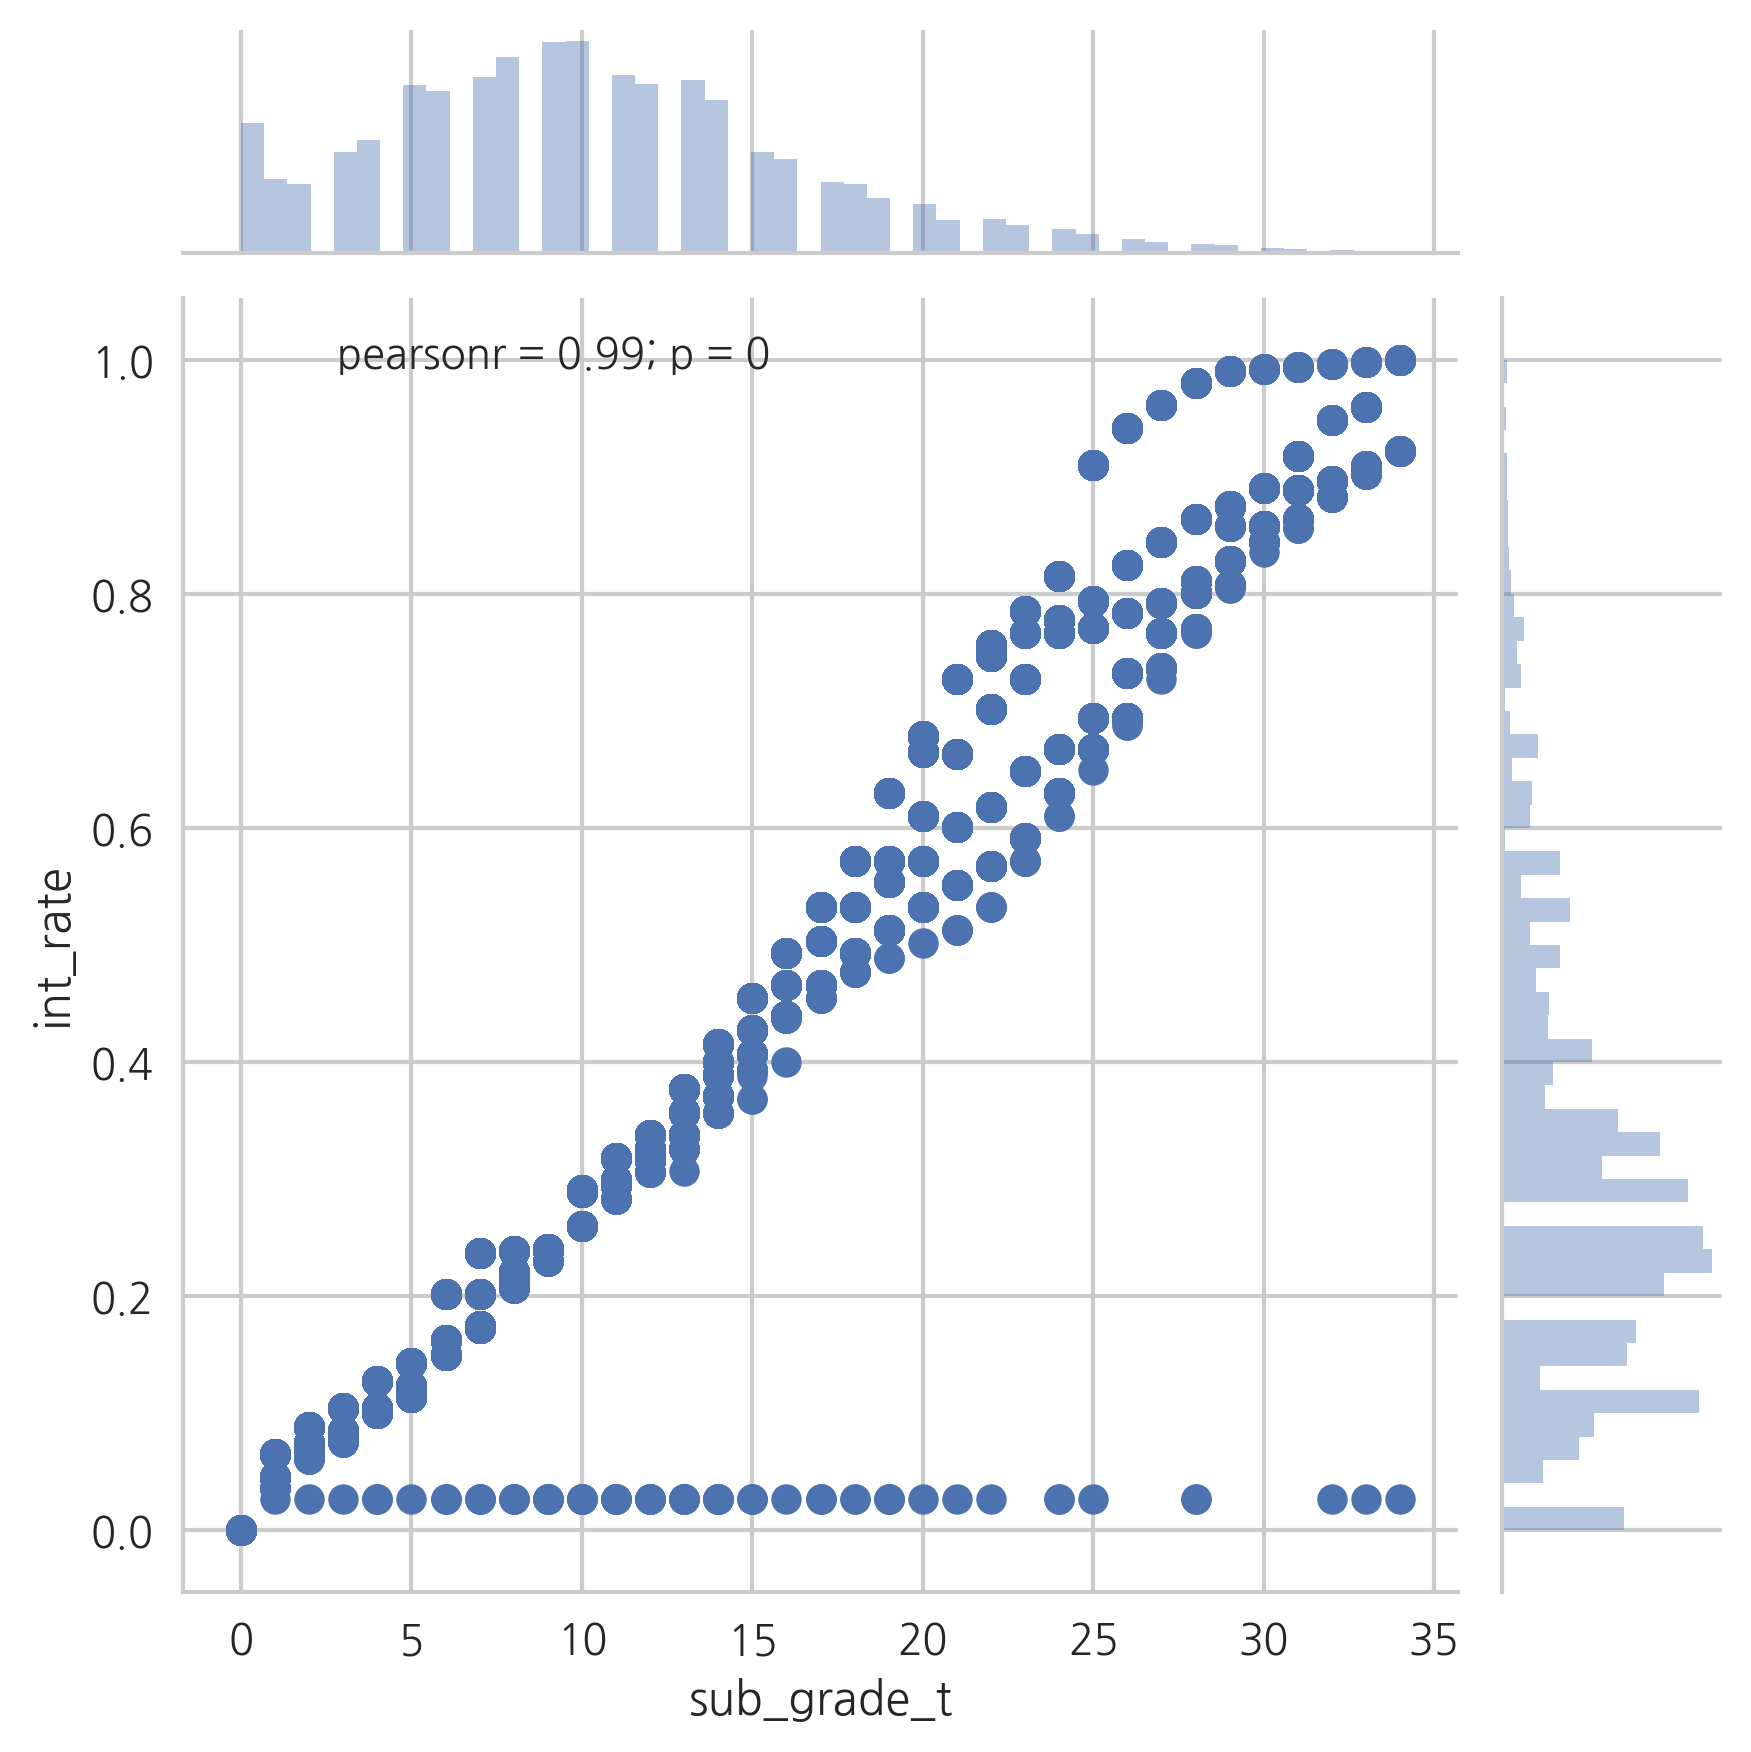

In [33]:
plt.figure(figsize=(9,9))
sns.jointplot(df0.sub_grade_t,df0.int_rate)
plt.show()

# 모델 생성 작업

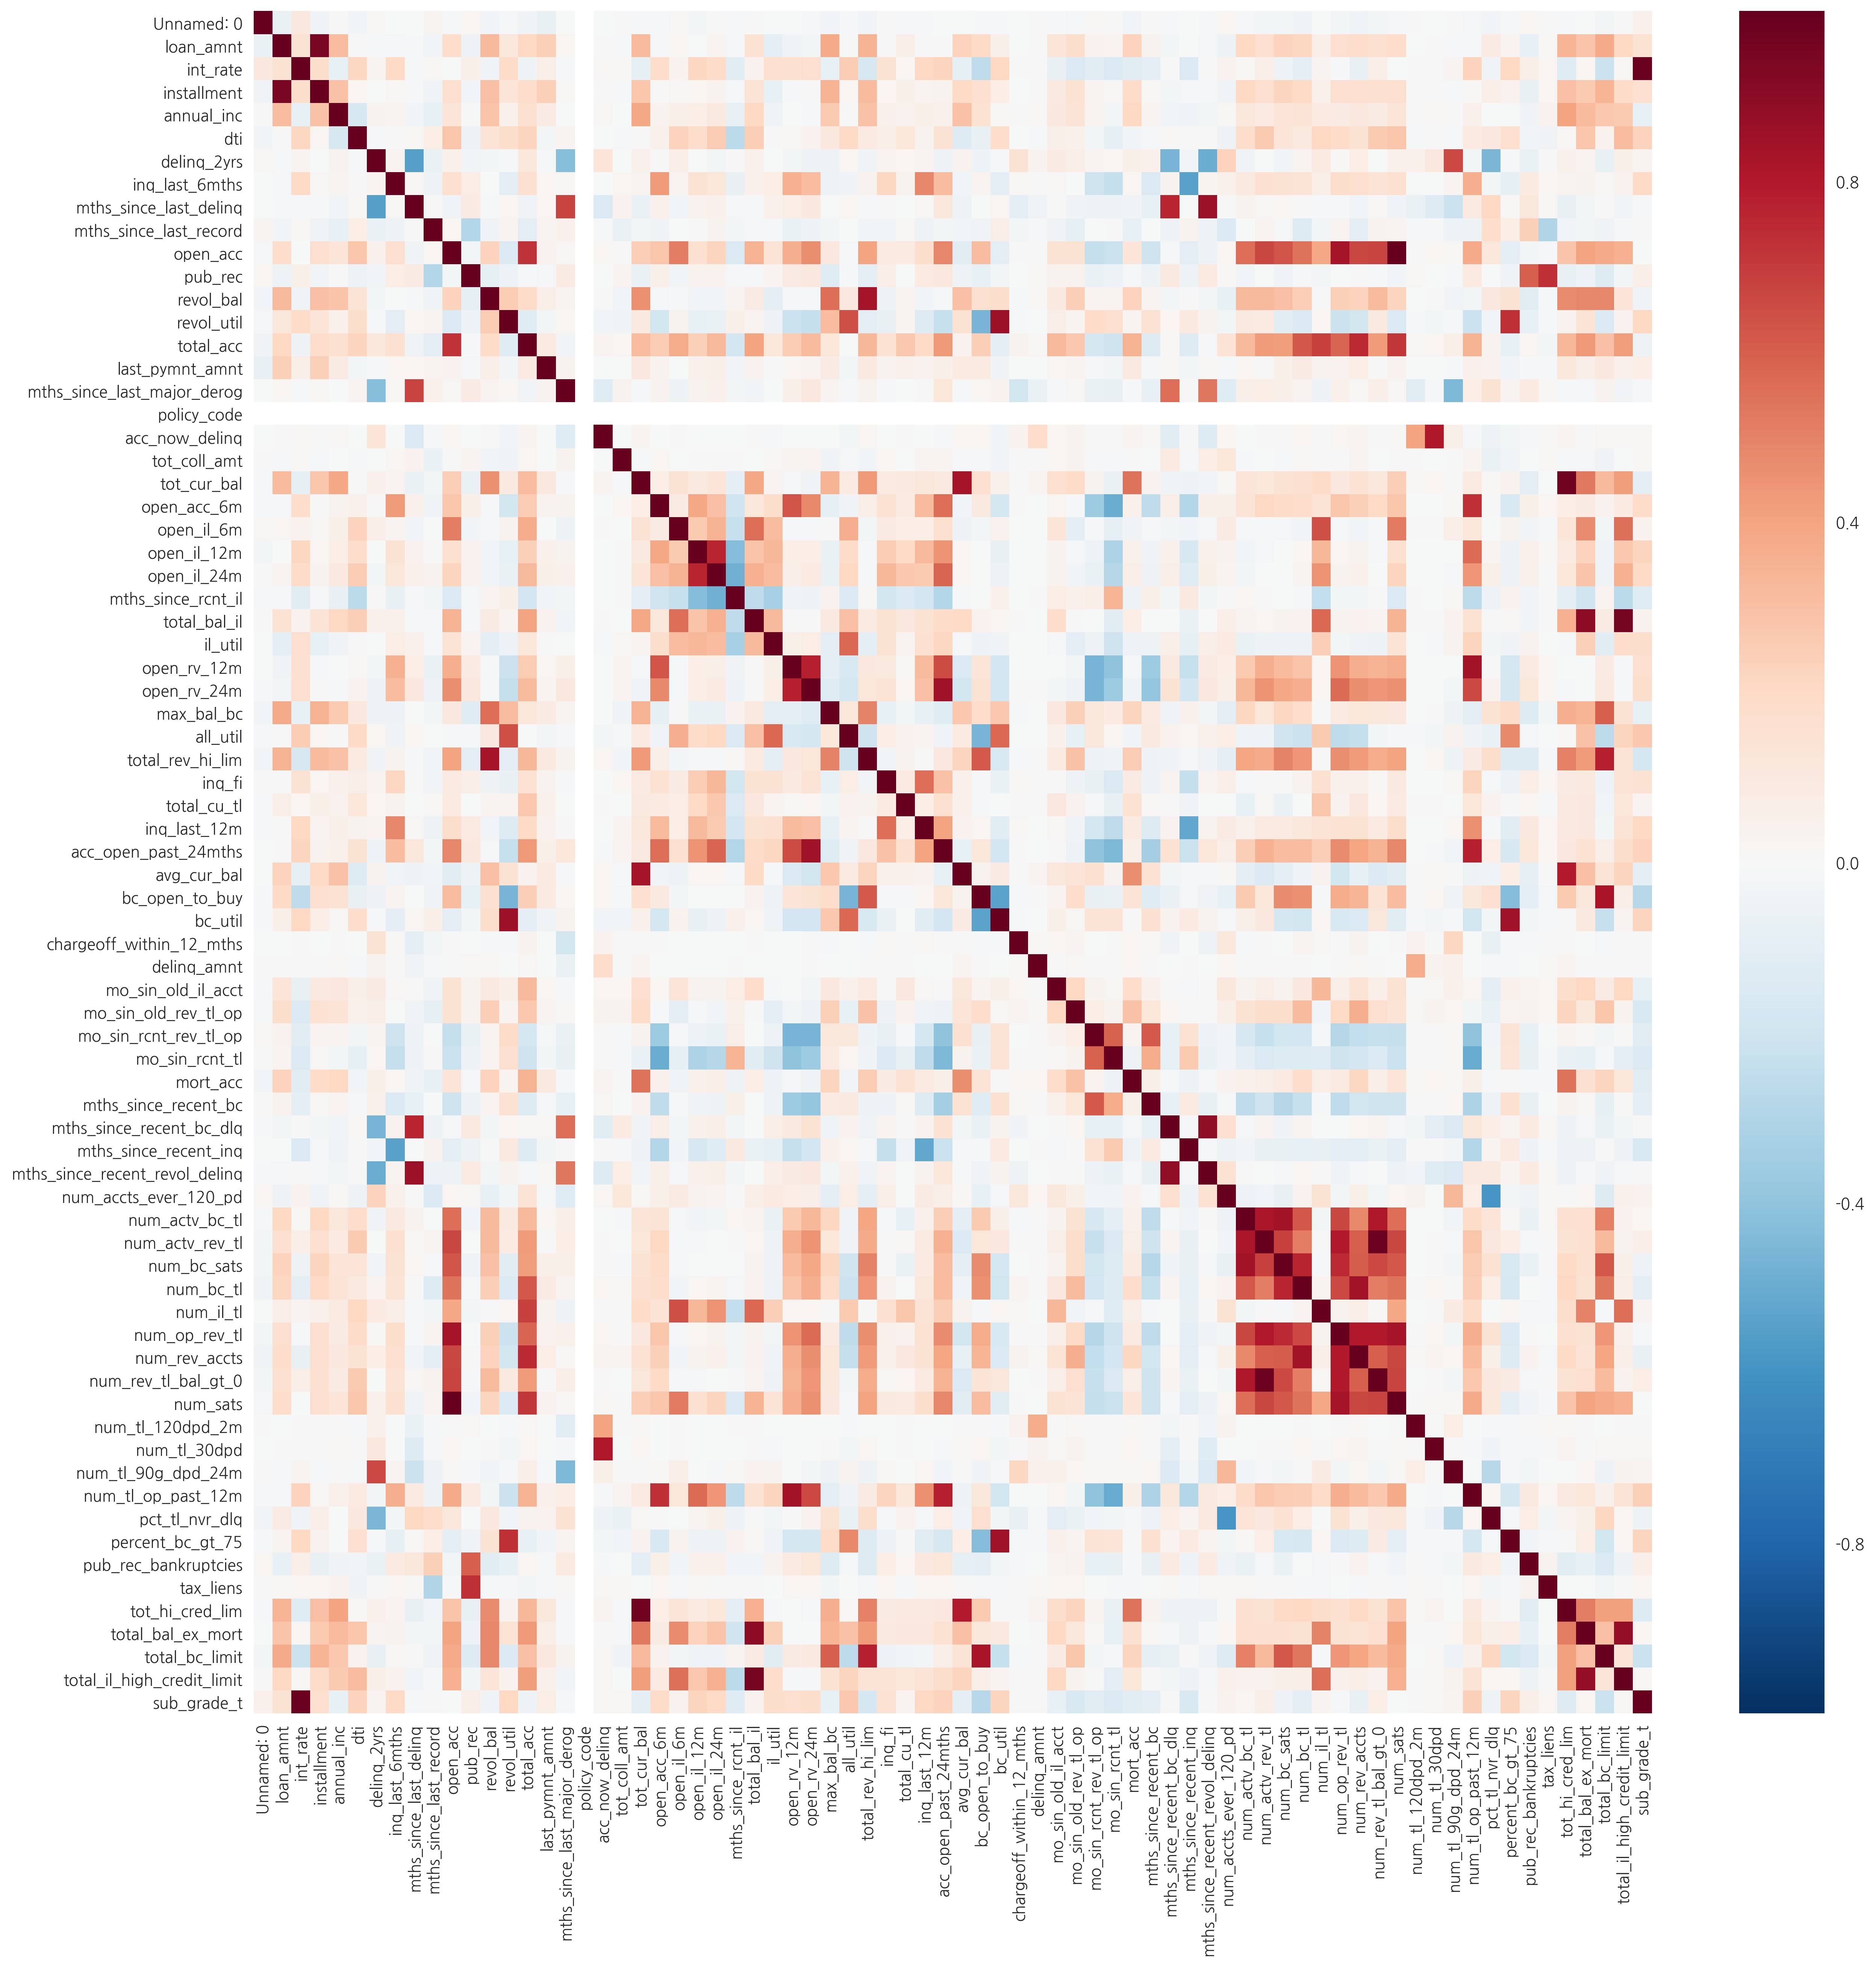

In [34]:
plt.figure(figsize =(20,20))
sns.heatmap(df0.corr())
plt.show()

In [4]:
df0corr = df0.corr()

In [5]:
df0corr[(df0corr >= 0.8) | (df0corr <= -0.8)].fillna('').head()

,Unnamed: 0,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
Unnamed: 0,1,,,,,,,,,,...,,,,,,,,,,
loan_amnt,,1,,0.950004,,,,,,,...,,,,,,,,,,
int_rate,,,1,,,,,,,,...,,,,,,,,,,
installment,,0.950004,,1,,,,,,,...,,,,,,,,,,
annual_inc,,,,,1,,,,,,...,,,,,,,,,,


In [6]:
df0.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 
             'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
             'total_rec_int', 'total_rec_late_fee', 'recoveries', 
             'collection_recovery_fee', 'collections_12_mths_ex_med'], 
            axis=1, inplace=True)

In [7]:
df0corr = df0.corr()

In [8]:
df0corr[(df0corr >= 0.8) | (df0corr <= -0.8)].fillna('').head()

,Unnamed: 0,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
Unnamed: 0,1,,,,,,,,,,...,,,,,,,,,,
loan_amnt,,1,,0.950004,,,,,,,...,,,,,,,,,,
int_rate,,,1,,,,,,,,...,,,,,,,,,,
installment,,0.950004,,1,,,,,,,...,,,,,,,,,,
annual_inc,,,,,1,,,,,,...,,,,,,,,,,


In [9]:
df1 = df0.drop(['loan_amnt', 'mths_since_last_delinq', 
                     'mths_since_last_record', 'last_pymnt_amnt', 
                     'open_acc', 'revol_util', 'revol_bal', 
                     'acc_now_delinq', 'tot_cur_bal', 'total_bal_il', 
                     'open_rv_12m' ,'open_rv_24m', 'bc_open_to_buy', 
                     'bc_util', 'mths_since_recent_bc_dlq', 
                     'num_actv_bc_tl', 'num_bc_tl', 'num_op_rev_tl', 
                     'total_bal_ex_mort', 'num_actv_rev_tl'], 
                    axis=1)

In [10]:
df1.corr()[(df1.corr() >= 0.8) | (df1.corr() <= -0.8)].head()

,Unnamed: 0,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,total_acc,mths_since_last_major_derog,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit
Unnamed: 0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df1['const'] = 1
df1.head()

,Unnamed: 0,term,int_rate,installment,sub_grade,home_ownership,annual_inc,pymnt_plan,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,const
0,0,60 months,0.172575,0.198015,B3,OWN,0.012019,n,0.358136,1,...,0,5,0.946,16.7,0,0,0.015805,0.022614,0.019098,1
1,1,36 months,0.080639,0.100477,A4,MORTGAGE,0.007002,n,0.284948,0,...,0,1,1.000,0.0,0,0,0.004265,0.008503,0.011069,1
2,2,36 months,0.503701,0.111881,D3,MORTGAGE,0.005051,n,0.280800,0,...,0,4,0.846,0.0,0,0,0.019800,0.002352,0.003852,1
3,3,36 months,0.211531,0.106517,B4,RENT,0.003135,n,0.526470,0,...,0,3,1.000,100.0,0,0,0.003113,0.001900,0.014363,1
4,4,36 months,0.119595,0.183338,B1,RENT,0.004494,n,0.746036,0,...,0,1,1.000,0.0,0,0,0.005932,0.005246,0.024103,1


In [13]:
df2 = df1.dropna(axis=0)

In [14]:
df2cat = df2[['term', 'sub_grade', 'home_ownership', 'pymnt_plan', 'application_type', 'policy_code']]
df2y = df2[['int_rate']]
df2X = df2.drop(['term', 'sub_grade', 'home_ownership', 'pymnt_plan', 'application_type', 'policy_code', 'int_rate'], axis=1)

In [15]:
rs1 = sm.OLS(df2y, df2X).fit()
print(rs1.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     572.8
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:35:07   Log-Likelihood:                 27659.
No. Observations:               61490   AIC:                        -5.521e+04
Df Residuals:                   61438   BIC:                        -5.474e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Unnamed: 0  

In [16]:
rs2 = sm.OLS.from_formula('int_rate ~ installment + annual_inc + dti + delinq_2yrs + inq_last_6mths + total_acc + mths_since_last_major_derog + open_acc_6m + open_il_12m + open_il_24m + mths_since_rcnt_il + il_util + max_bal_bc + all_util + total_rev_hi_lim + inq_fi + total_cu_tl + inq_last_12m + acc_open_past_24mths + delinq_amnt + mo_sin_old_il_acct + mo_sin_old_rev_tl_op + mort_acc + mths_since_recent_bc + mths_since_recent_inq + mths_since_recent_revol_delinq + num_accts_ever_120_pd + num_bc_sats + num_sats + num_tl_30dpd + num_tl_90g_dpd_24m + num_tl_op_past_12m + percent_bc_gt_75 + pub_rec_bankruptcies + tot_hi_cred_lim + total_bc_limit + total_il_high_credit_limit', df2).fit()
print(rs2.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     743.3
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:35:18   Log-Likelihood:                 27072.
No. Observations:               61490   AIC:                        -5.407e+04
Df Residuals:                   61452   BIC:                        -5.373e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [17]:
rs3 = sm.OLS.from_formula('int_rate ~ sub_grade + 0', df2).fit()
print(rs3.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 9.244e+04
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:36:56   Log-Likelihood:             1.3726e+05
No. Observations:               61490   AIC:                        -2.745e+05
Df Residuals:                   61455   BIC:                        -2.741e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sub_grade[A1]          0      0.001          0

In [19]:
sm.stats.anova_lm(rs2)

,df,sum_sq,mean_sq,F,PR(>F)
installment,1.0,126.802431,126.802431,5220.897609,0.000000e+00
annual_inc,1.0,49.473150,49.473150,2036.981824,0.000000e+00
dti,1.0,63.686465,63.686465,2622.193491,0.000000e+00
delinq_2yrs,1.0,2.395700,2.395700,98.639316,3.154147e-23
inq_last_6mths,1.0,78.768845,78.768845,3243.187606,0.000000e+00
total_acc,1.0,27.373908,27.373908,1127.079106,7.156787e-245
mths_since_last_major_derog,1.0,0.681312,0.681312,28.051968,1.185062e-07
open_acc_6m,1.0,39.653425,39.653425,1632.669567,0.000000e+00
open_il_12m,1.0,55.468301,55.468301,2283.823092,0.000000e+00
open_il_24m,1.0,4.494058,4.494058,185.036018,4.435651e-42


In [22]:
df2['lograte'] = df2.int_rate.map(np.log)

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
rs2 = sm.OLS.from_formula('int_rate ~ installment + annual_inc + dti + delinq_2yrs + inq_last_6mths + total_acc + mths_since_last_major_derog + open_acc_6m + open_il_12m + open_il_24m + mths_since_rcnt_il + il_util + max_bal_bc + all_util + total_rev_hi_lim + inq_fi + total_cu_tl + inq_last_12m + acc_open_past_24mths + delinq_amnt + mo_sin_old_il_acct + mo_sin_old_rev_tl_op + mort_acc + mths_since_recent_bc + mths_since_recent_inq + mths_since_recent_revol_delinq + num_accts_ever_120_pd + num_bc_sats + num_sats + num_tl_30dpd + num_tl_90g_dpd_24m + num_tl_op_past_12m + percent_bc_gt_75 + pub_rec_bankruptcies + tot_hi_cred_lim + total_bc_limit + total_il_high_credit_limit', df2).fit()
print(rs2.summary())

                            OLS Regression Results                            
Dep. Variable:                lograte   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 12 Jul 2017   Prob (F-statistic):                nan
Time:                        11:38:35   Log-Likelihood:                    nan
No. Observations:               61490   AIC:                               nan
Df Residuals:                   61453   BIC:                               nan
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/home/dockeruser/anaconda2/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1366: RuntimeWarning: invalid value encountered in subtract
  weights=weights))**2)


In [35]:
a = 'installment + annual_inc + dti + delinq_2yrs + inq_last_6mths + total_acc + mths_since_last_major_derog + open_acc_6m + open_il_12m + open_il_24m + mths_since_rcnt_il + il_util + max_bal_bc + all_util + total_rev_hi_lim + inq_fi + total_cu_tl + inq_last_12m + acc_open_past_24mths + delinq_amnt + mo_sin_old_il_acct + mo_sin_old_rev_tl_op + mort_acc + mths_since_recent_bc + mths_since_recent_inq + mths_since_recent_revol_delinq + num_accts_ever_120_pd + num_bc_sats + num_sats + num_tl_30dpd + num_tl_90g_dpd_24m + num_tl_op_past_12m + percent_bc_gt_75 + pub_rec_bankruptcies + tot_hi_cred_lim + total_bc_limit + total_il_high_credit_limit'.split(' + ')
df3X = df2[a]
df3y = df2.int_rate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
cross_val_score(LinearRegression(), df3X, df3y, scoring="neg_mean_squared_error", cv=10)

array([-0.02512199, -0.02172267, -0.02044347, -0.02348742, -0.02369231,
       -0.02755184, -0.02391492, -0.02636546, -0.02609852, -0.02638499])

# 결론

# well-qualified buyers의 조건은 크게 3가지

##  1. 크레딧 점수와 사용실적 (50%)
##  2. 직업과 개인소득 (30%)
##  3. 다운페이먼트 (20%)

###    1. 신용등급 산정기준

1. 35%는 대출상환이력과, 파산, 차압, 채무, 및 세금 저당권과의 관계

2. 30%는 카드사용실적과 여러 계좌의 개수, 신용카드 한도액, 신용카드 사용액, 그리고 신용카드 한도액과 사용액의 비율이 

3. 15%는 신용거래기간과 관계가 있습니다. 
   -일반적으로 미국서 집을 구입하실때 좋은 모기지 은행과 거래를 하시려면 24개월 이상된 3개의 계좌가 있으시다면 아주 유리합니다.

4. 10%는 금융기관의 신용조회건수와 관계가 있습니다.
   -최근 90일이내의 신용조회횟수와 누가 언제 조회를 했는지 알 수 있습니다. 
5. 10%는 여러가지 기타 상황에 따라서 결정됩니다.

https://www.dcapp.org/dmv/2291